# WALMART DATA ANALYSIS

In [1]:
#IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#IMPORTING DATASETS
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores_df = pd.read_csv("stores.csv")

In [3]:
features

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [4]:
stores_df

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [5]:
train

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False
...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False
421566,45,98,2012-10-05,628.10,False
421567,45,98,2012-10-12,1061.02,False
421568,45,98,2012-10-19,760.01,False


In [6]:
#INFO OF TRAIN DATAFRAME
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
#DESCRIPTION OF TRAIN DATAFRAME
train.describe()

,Store,Dept,Weekly_Sales
count,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123
std,12.785297,30.492054,22711.183519
min,1.000000,1.000000,-4988.940000
25%,11.000000,18.000000,2079.650000
50%,22.000000,37.000000,7612.030000
75%,33.000000,74.000000,20205.852500
max,45.000000,99.000000,693099.360000


In [8]:
#TO CHECK IF TRAIN DATAFRAME HAS NULL VALUES
train.isnull().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [9]:
#INFO OF FEATURES DATA FRAME
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [10]:
#DESCRIPTION OF FEATURES DATAFRAME
features.describe()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
count,8190.000000,8190.000000,8190.000000,4032.000000,2921.000000,3613.000000,3464.000000,4050.000000,7605.000000,7605.000000
mean,23.000000,59.356198,3.405992,7032.371786,3384.176594,1760.100180,3292.935886,4132.216422,172.460809,7.826821
std,12.987966,18.678607,0.431337,9262.747448,8793.583016,11276.462208,6792.329861,13086.690278,39.738346,1.877259
min,1.000000,-7.290000,2.472000,-2781.450000,-265.760000,-179.260000,0.220000,-185.170000,126.064000,3.684000
25%,12.000000,45.902500,3.041000,1577.532500,68.880000,6.600000,304.687500,1440.827500,132.364839,6.634000
50%,23.000000,60.710000,3.513000,4743.580000,364.570000,36.260000,1176.425000,2727.135000,182.764003,7.806000
75%,34.000000,73.880000,3.743000,8923.310000,2153.350000,163.150000,3310.007500,4832.555000,213.932412,8.567000
max,45.000000,101.950000,4.468000,103184.980000,104519.540000,149483.310000,67474.850000,771448.100000,228.976456,14.313000


In [11]:
#DESCRIPTION OF STORES DATAFRAME
stores_df.describe()

,Store,Size
count,45.000000,45.000000
mean,23.000000,130287.600000
std,13.133926,63825.271991
min,1.000000,34875.000000
25%,12.000000,70713.000000
50%,23.000000,126512.000000
75%,34.000000,202307.000000
max,45.000000,219622.000000


In [12]:
#MERGING FEATURES AND STORES_DF DATAFRAME USING INNER JOIN
dataset_m = features.merge(stores_df,how='inner',on='Store')

In [13]:
dataset_m

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,2013-06-28,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False,B,118221
8186,45,2013-07-05,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False,B,118221
8187,45,2013-07-12,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False,B,118221
8188,45,2013-07-19,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False,B,118221


In [14]:
#CHECKING NAMES OF COLUMNS IN MERGED DATAFRAME
dataset_m.columns

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday', 'Type', 'Size'],
      dtype='object')

In [15]:
#CHECKING NAMES OF COLUMNS IN TRAIN DATAFRAME
train.columns

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday'], dtype='object')

In [16]:
#MERGING PREVIOUSLY MERGED DATAFRAME WITH TRAIN DATAFRAME
data = dataset_m.merge(train,how='inner',on = ['Store','Date','IsHoliday'])

In [17]:
#CONVERTING DATE COLUMN TO DATATIME DATATYPE
data.Date = pd.to_datetime(data['Date'],errors='coerce')

In [18]:
#INFO OF FINAL DATAFRAME
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         421570 non-null  int64         
 1   Date          421570 non-null  datetime64[ns]
 2   Temperature   421570 non-null  float64       
 3   Fuel_Price    421570 non-null  float64       
 4   MarkDown1     150681 non-null  float64       
 5   MarkDown2     111248 non-null  float64       
 6   MarkDown3     137091 non-null  float64       
 7   MarkDown4     134967 non-null  float64       
 8   MarkDown5     151432 non-null  float64       
 9   CPI           421570 non-null  float64       
 10  Unemployment  421570 non-null  float64       
 11  IsHoliday     421570 non-null  bool          
 12  Type          421570 non-null  object        
 13  Size          421570 non-null  int64         
 14  Dept          421570 non-null  int64         
 15  Weekly_Sales  421

In [19]:
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48


# Visualization

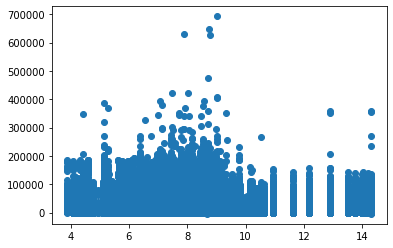

In [20]:
#SCATTERPLOT RELATION BETWEEN UNEMPLOYMENT COLUMN AND WEEKLY SALES
plt.scatter(data['Unemployment'],data['Weekly_Sales'])

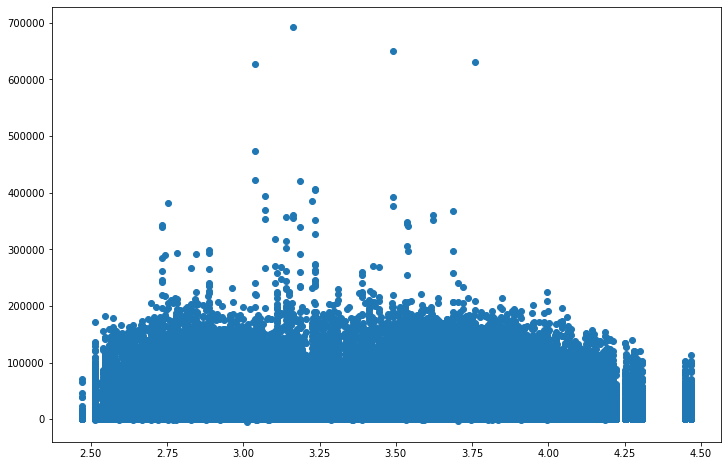

In [21]:
#FUNCTION TO FIND SCATTERPLOT RELATIONSHIP BETWEEN ANY COLUMN AND WEEKLY SALES COLUMN
def scatter(x):
    plt.figure(figsize=(12,8))
    plt.scatter(data[x],data['Weekly_Sales'])

scatter("Fuel_Price")

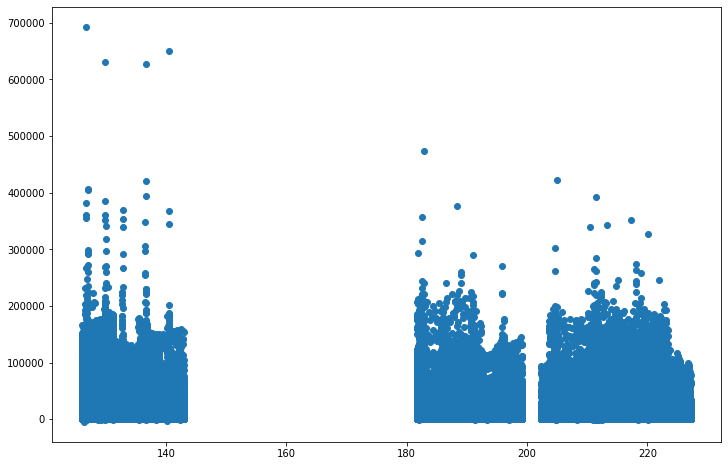

In [22]:
#SCATTERPLOT RELATIONSHIP BETWEEN CPI AND WEEKLY SALES
scatter("CPI")

In [23]:
#MAKING A NEW YEAR COLUMN WITH THE HELP OF DATE COLUMN
data['year'] = pd.DatetimeIndex(data['Date']).year
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,year
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,2010
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,2010
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12,2010
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04,2010
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80,2012
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31,2012
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47,2012
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48,2012


In [24]:
#MAKING A WEEK COLUMN WITH THE HELP OF isocalender() FUNCTION AND Date COLUMN
data['week']=data.Date.dt.isocalendar().week

In [25]:
data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size,Dept,Weekly_Sales,year,week
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,1,24924.50,2010,5
1,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,2,50605.27,2010,5
2,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,3,13740.12,2010,5
3,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,4,39954.04,2010,5
4,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315,5,32229.38,2010,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,93,2487.80,2012,43
421566,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,94,5203.31,2012,43
421567,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,95,56017.47,2012,43
421568,45,2012-10-26,58.85,3.882,4018.91,58.08,100.0,211.94,858.33,192.308899,8.667,False,B,118221,97,6817.48,2012,43


In [26]:
#CHECKING WHICH ARE THE UNIQUE YEARS IN THE DATAFRAME
data.year.unique()

array([2010, 2011, 2012], dtype=int64)

In [27]:
#for 2011 - what is the average sales in every week of 2011
sales_2011 = data[data['year'] == 2011].groupby('week')['Weekly_Sales'].mean()

<AxesSubplot:>

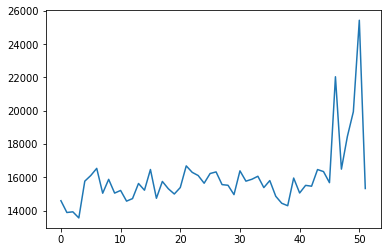

In [28]:
sns.lineplot(sales_2011.values)

In [29]:
#for 2010 - what is the average sales in every week of 2010
sales_2010 = data[data['year'] == 2010].groupby('week')['Weekly_Sales'].mean()

<AxesSubplot:>

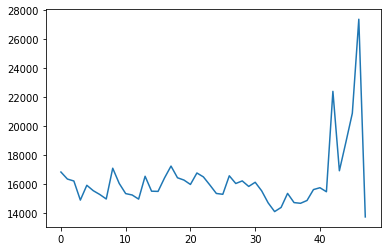

In [30]:
sns.lineplot(sales_2010.values)

In [31]:
#for 2012 - what is the average sales in every week of 2012
sales_2012 = data[data['year'] == 2012].groupby('week')['Weekly_Sales'].mean()

<AxesSubplot:>

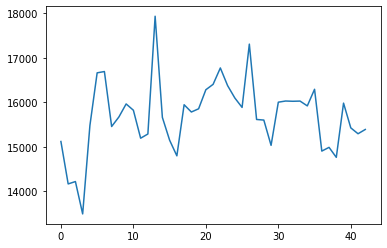

In [32]:
sns.lineplot(sales_2012.values)

In [33]:
df = data.groupby(['year','week'])['Weekly_Sales'].mean().reset_index()

In [34]:
#MERGING YEAR AND WEEK
lst = []
for i,j in zip(df.year,df.week):
    lst.append(str(i) + '_' + str(j))
    
lst

['2010_5',
 '2010_6',
 '2010_7',
 '2010_8',
 '2010_9',
 '2010_10',
 '2010_11',
 '2010_12',
 '2010_13',
 '2010_14',
 '2010_15',
 '2010_16',
 '2010_17',
 '2010_18',
 '2010_19',
 '2010_20',
 '2010_21',
 '2010_22',
 '2010_23',
 '2010_24',
 '2010_25',
 '2010_26',
 '2010_27',
 '2010_28',
 '2010_29',
 '2010_30',
 '2010_31',
 '2010_32',
 '2010_33',
 '2010_34',
 '2010_35',
 '2010_36',
 '2010_37',
 '2010_38',
 '2010_39',
 '2010_40',
 '2010_41',
 '2010_42',
 '2010_43',
 '2010_44',
 '2010_45',
 '2010_46',
 '2010_47',
 '2010_48',
 '2010_49',
 '2010_50',
 '2010_51',
 '2010_52',
 '2011_1',
 '2011_2',
 '2011_3',
 '2011_4',
 '2011_5',
 '2011_6',
 '2011_7',
 '2011_8',
 '2011_9',
 '2011_10',
 '2011_11',
 '2011_12',
 '2011_13',
 '2011_14',
 '2011_15',
 '2011_16',
 '2011_17',
 '2011_18',
 '2011_19',
 '2011_20',
 '2011_21',
 '2011_22',
 '2011_23',
 '2011_24',
 '2011_25',
 '2011_26',
 '2011_27',
 '2011_28',
 '2011_29',
 '2011_30',
 '2011_31',
 '2011_32',
 '2011_33',
 '2011_34',
 '2011_35',
 '2011_36',
 '2011

In [35]:
#SAVING THE MERGED DATA IN NEW YEAR_WEEK COLUMN
df['year_week'] = lst

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62,
  63,
  64,
  65,
  66,
  67,
  68,
  69,
  70,
  71,
  72,
  73,
  74,
  75,
  76,
  77,
  78,
  79,
  80,
  81,
  82,
  83,
  84,
  85,
  86,
  87,
  88,
  89,
  90,
  91,
  92,
  93,
  94,
  95,
  96,
  97,
  98,
  99,
  100,
  101,
  102,
  103,
  104,
  105,
  106,
  107,
  108,
  109,
  110,
  111,
  112,
  113,
  114,
  115,
  116,
  117,
  118,
  119,
  120,
  121,
  122,
  123,
  124,
  125,
  126,
  127,
  128,
  129,
  130,
  131,
  132,
  133,
  134,
  135,
  136,
  137,
  138,
  139,
  140,
  141,
  142],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),


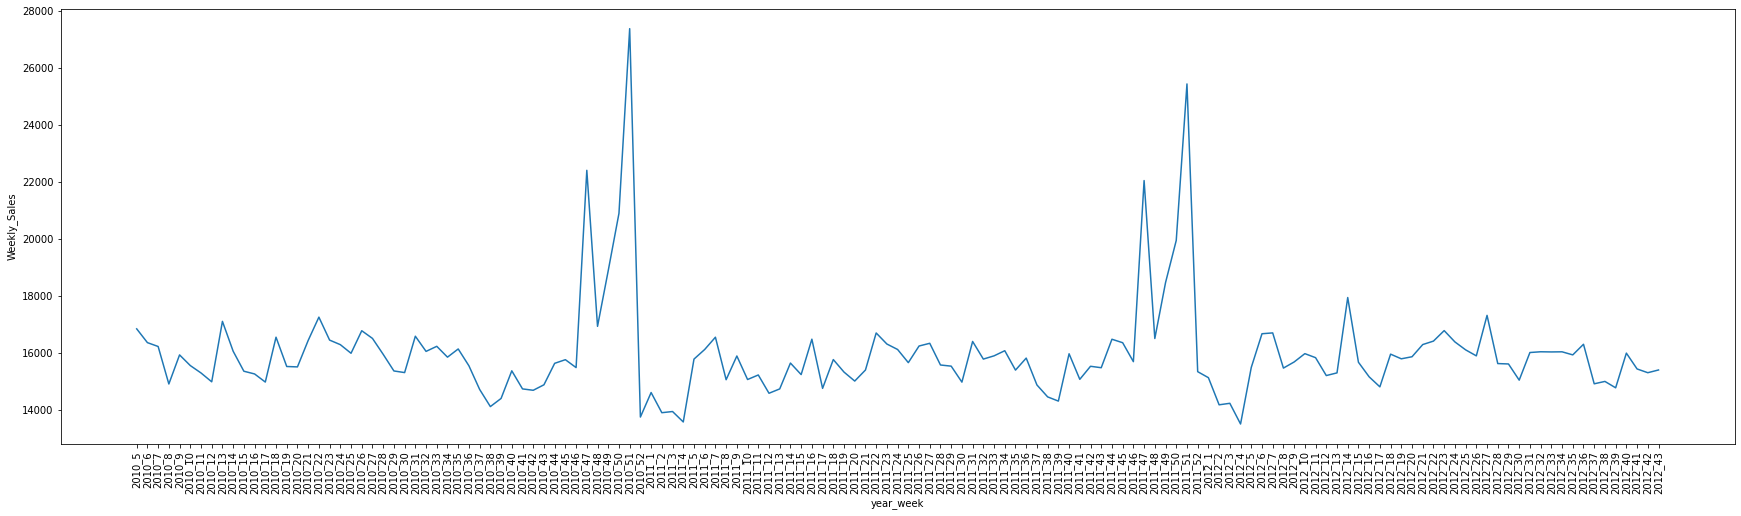

In [36]:
#RELATIONSHIP BETWEEN YEAR_WEEK COLUMN AND WEEKLY_SALES COLUMN
plt.figure(figsize=(30,8))
sns.lineplot(x=df.year_week,y=df.Weekly_Sales)
plt.xticks(rotation=90)

<AxesSubplot:xlabel='Type', ylabel='Size'>

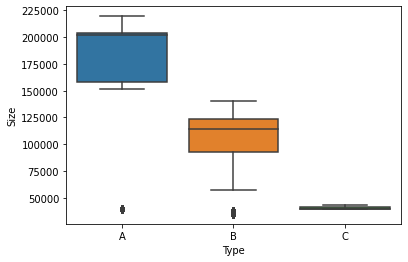

In [37]:
## relationship between type and size of store
sns.boxplot(x='Type',y='Size',data=data)

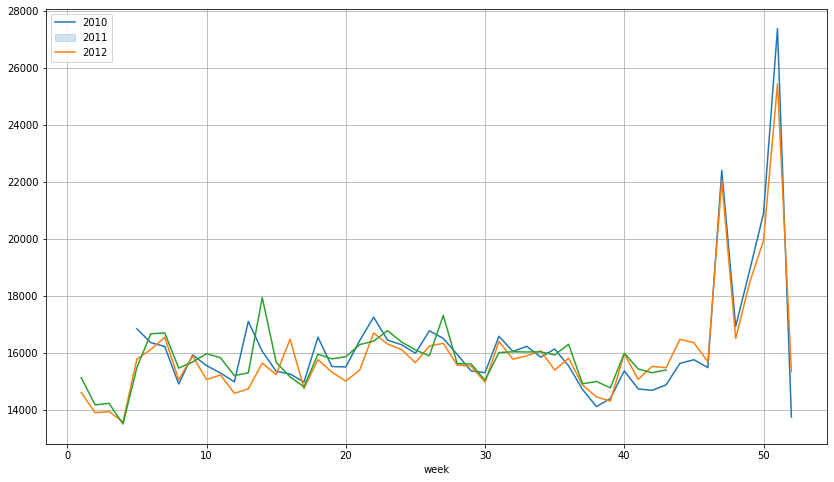

In [38]:
#WEEKLY SALES OF ALL YEARS IN ONE GRAPH
plt.figure(figsize=(14,8))
sns.lineplot(x=sales_2010.index,y=sales_2010.values)
sns.lineplot(x=sales_2011.index,y=sales_2011.values)
sns.lineplot(x=sales_2012.index,y=sales_2012.values)
plt.grid()
plt.legend(['2010','2011','2012'])

In [46]:
#which store have maximum average sale and minimum average sale
data.groupby('Store')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales')

,Store,Weekly_Sales
4,5,5053.415813
32,33,5728.414053
43,44,6038.929814
2,3,6373.033983
37,38,7492.478460
15,16,7863.224124
28,29,8158.810609
6,7,8358.766148
35,36,8584.412563
29,30,8764.237719


In [47]:
#does the type of store impact the sales
data.groupby('Type')['Size'].mean().reset_index().sort_values(by='Size')

,Type,Size
2,C,40535.725286
1,B,101818.735827
0,A,182231.285486


In [49]:
#RELATIONSHIP BETWEEN DEPARTMENT OF STORES AND WEEKLY SALES
data.groupby(['Store','Dept'])['Weekly_Sales'].mean()

Store  Dept
1      1       22513.322937
       2       46102.090420
       3       13150.478042
       4       36964.154476
       5       24257.941119
                   ...     
45     94       3690.272090
       95      52896.166643
       96          2.970000
       97       6466.961888
       98        561.239037
Name: Weekly_Sales, Length: 3331, dtype: float64

In [50]:
### Weekend sales more than weekdays or not
data.groupby('IsHoliday')['Weekly_Sales'].mean().reset_index().sort_values(by='Weekly_Sales')

,IsHoliday,Weekly_Sales
0,False,15901.445069
1,True,17035.823187
